In [11]:
import os
import time
import cs412_mingraphcolor_exact
test_cases = 'test_cases/random_graphs'
src = 'cs412_mingraphcolor_exact.py'

In [12]:
def list_filenames(dir):
    files = os.listdir(dir)
    print(files)
    return files
list_filenames(test_cases)

['730_rand_graph', '410_rand_graph', '31_rand_graph', '310_rand_graph', '920_rand_graph', '870_rand_graph', '42_rand_graph', '540_rand_graph', '240_rand_graph', '380_rand_graph', '480_rand_graph', '160_rand_graph', '660_rand_graph', '210_rand_graph', '47_rand_graph', '510_rand_graph', '820_rand_graph', '630_rand_graph', '39_rand_graph', '130_rand_graph', '580_rand_graph', '280_rand_graph', '760_rand_graph', '28_rand_graph', '970_rand_graph', '34_rand_graph', '340_rand_graph', '440_rand_graph', '370_rand_graph', '33_rand_graph', '470_rand_graph', '51_rand_graph', '190_rand_graph', '690_rand_graph', '940_rand_graph', '880_rand_graph', '750_rand_graph', '600_rand_graph', '100_rand_graph', '810_rand_graph', '40_rand_graph', '220_rand_graph', '520_rand_graph', '150_rand_graph', '650_rand_graph', '980_rand_graph', '570_rand_graph', '45_rand_graph', '270_rand_graph', '27_rand_graph', '840_rand_graph', '790_rand_graph', '910_rand_graph', '420_rand_graph', '36_rand_graph', '320_rand_graph', '70

['730_rand_graph',
 '410_rand_graph',
 '31_rand_graph',
 '310_rand_graph',
 '920_rand_graph',
 '870_rand_graph',
 '42_rand_graph',
 '540_rand_graph',
 '240_rand_graph',
 '380_rand_graph',
 '480_rand_graph',
 '160_rand_graph',
 '660_rand_graph',
 '210_rand_graph',
 '47_rand_graph',
 '510_rand_graph',
 '820_rand_graph',
 '630_rand_graph',
 '39_rand_graph',
 '130_rand_graph',
 '580_rand_graph',
 '280_rand_graph',
 '760_rand_graph',
 '28_rand_graph',
 '970_rand_graph',
 '34_rand_graph',
 '340_rand_graph',
 '440_rand_graph',
 '370_rand_graph',
 '33_rand_graph',
 '470_rand_graph',
 '51_rand_graph',
 '190_rand_graph',
 '690_rand_graph',
 '940_rand_graph',
 '880_rand_graph',
 '750_rand_graph',
 '600_rand_graph',
 '100_rand_graph',
 '810_rand_graph',
 '40_rand_graph',
 '220_rand_graph',
 '520_rand_graph',
 '150_rand_graph',
 '650_rand_graph',
 '980_rand_graph',
 '570_rand_graph',
 '45_rand_graph',
 '270_rand_graph',
 '27_rand_graph',
 '840_rand_graph',
 '790_rand_graph',
 '910_rand_graph',
 '42

In [13]:
def timefile(file):
    start = time.time()

    with open(file, 'r') as f:
        K = int(f.readline())
        pairs = [f.readline().split() for _ in range(K)]

        graph = cs412_mingraphcolor_exact.Graph(pairs)
        _, _ = graph.brute_force_color() # discard input we just want to time it

    end = time.time()
    return end - start

In [ ]:
with open('timed_output', 'w') as t:
    for file in list_filenames(test_cases):
        input_size = int(file.split('_')[0])
        time_taken = timefile(f'{test_cases}/{file}')
        t.write(f'{input_size}\t{time_taken}\n')

In [51]:
import pandas as pd
df = pd.read_csv('timed_output', sep='\t', names=['Input Size', 'Runtime (s)'])
df = df.sort_values(by='Input Size')

df_greedy = pd.read_csv('timed_output_greedy', sep='\t', names=['Input Size', 'Runtime (s)'])
df_greedy = df_greedy.sort_values(by='Input Size')
df.head(), df_greedy.head()

(    Input Size  Runtime (s)
 49          27     0.001614
 23          28     0.001485
 67          29     0.001410
 80          30     0.001600
 2           31     0.001607,
     Input Size  Runtime (s)
 49          27     0.001699
 23          28     0.001524
 67          29     0.000647
 80          30     0.000740
 2           31     0.000680)

In [52]:
import matplotlib.pyplot as plt
input_size = df['Input Size']
runtime = df['Runtime (s)']
input_size_greedy = df_greedy['Input Size']
runtime_greedy = df_greedy['Runtime (s)']

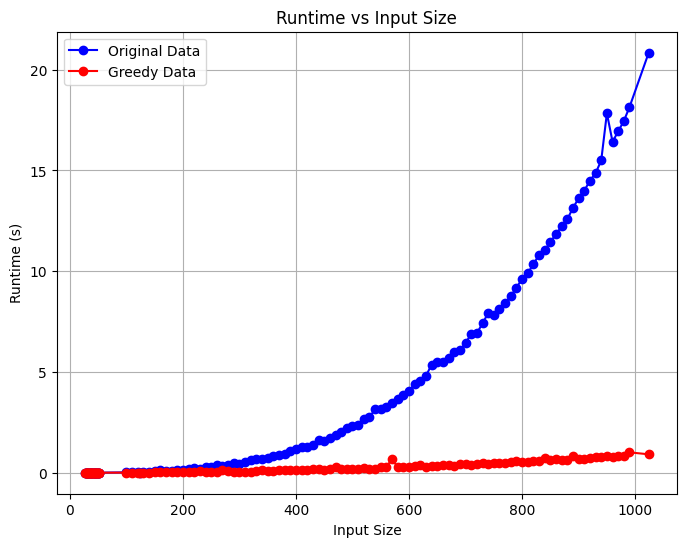

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(input_size, runtime, color='blue', marker='o', linestyle='-', label='Original Data')
plt.plot(input_size_greedy, runtime_greedy, color='red', marker='o', linestyle='-', label='Greedy Data')

plt.title('Runtime vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Runtime (s)')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
input_size = df['Input Size']
runtime = df['Runtime (s)']

import numpy as np
# from scipy.optimize import curve_fit

def exp_function(x, a, b):
    return a * np.exp(b * x)

In [28]:
# fit an exponential curve on our data
# popt, pcov = curve_fit(exp_function, input_size, runtime)
log_runtime = np.log(runtime)
coefficients = np.polyfit(input_size, log_runtime, 1)

In [34]:
# target_runtime = 20 * 60  # 20 min in sec
# predicted_input_size = np.log(target_runtime / popt[0]) / popt[1]
# predicted_input_size
target_runtime = 20 * 60 # 20 minutes in seconds
predicted_input_size = (np.log(target_runtime) - coefficients[1]) / coefficients[0]
predicted_input_size

1248.0869403502647

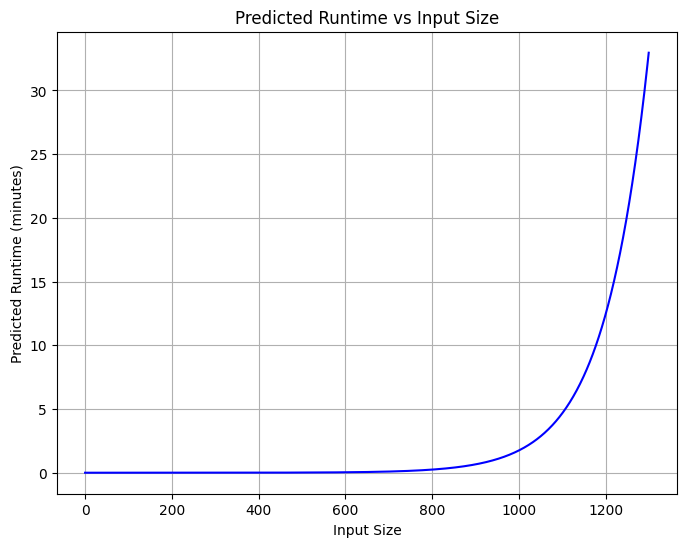

In [37]:
# Input sizes from 0 to 2000
input_sizes = np.arange(0, 1300)

# Predict runtime for each input size
predicted_runtime = np.exp(np.polyval(coefficients, input_sizes))

# Convert runtime to minutes
predicted_runtime_minutes = predicted_runtime / 60  # Convert seconds to minutes

# Plot the predicted graph
plt.figure(figsize=(8, 6))
plt.plot(input_sizes, predicted_runtime_minutes, color='blue')
plt.title('Predicted Runtime vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Predicted Runtime (minutes)')
plt.grid(True)
plt.show()

In [39]:
print(coefficients)

[ 0.00981268 -5.15699514]


In [41]:
import cs412_mingraphcolor_approx
from collections import defaultdict
# conors greedy
def timefile_greedy(file):
    start = time.time()

    with open(file, 'r') as f:
        K = int(f.readline())
        pairs = [f.readline().split() for _ in range(K)]

        # build color assignments by vertex : color
        # assignments = {v: int(k) for v, k in pairs}
        colors = defaultdict()
        graph = defaultdict()
        
        for pair in pairs: # Dont want them pointing to the same memory
            v, u = pair[0], pair[1]
            colors[v], colors[u] = None, None
            
            if v not in graph:
                graph[v] = set()
                
            if u not in graph:
                graph[u] = set()
                
            graph[v].add(u)
            graph[u].add(v)
        
        # print(graph)
        cs412_mingraphcolor_approx.greedy_color(graph, colors)

    end = time.time()
    return end - start

In [42]:
with open('timed_output_greedy', 'w') as t:
    for file in list_filenames(test_cases):
        input_size = int(file.split('_')[0])
        time_taken = timefile_greedy(f'{test_cases}/{file}')
        t.write(f'{input_size}\t{time_taken}\n')

['730_rand_graph', '410_rand_graph', '31_rand_graph', '310_rand_graph', '920_rand_graph', '870_rand_graph', '42_rand_graph', '540_rand_graph', '240_rand_graph', '380_rand_graph', '480_rand_graph', '160_rand_graph', '660_rand_graph', '210_rand_graph', '47_rand_graph', '510_rand_graph', '820_rand_graph', '630_rand_graph', '39_rand_graph', '130_rand_graph', '580_rand_graph', '280_rand_graph', '760_rand_graph', '28_rand_graph', '970_rand_graph', '34_rand_graph', '340_rand_graph', '440_rand_graph', '370_rand_graph', '33_rand_graph', '470_rand_graph', '51_rand_graph', '190_rand_graph', '690_rand_graph', '940_rand_graph', '880_rand_graph', '750_rand_graph', '600_rand_graph', '100_rand_graph', '810_rand_graph', '40_rand_graph', '220_rand_graph', '520_rand_graph', '150_rand_graph', '650_rand_graph', '980_rand_graph', '570_rand_graph', '45_rand_graph', '270_rand_graph', '27_rand_graph', '840_rand_graph', '790_rand_graph', '910_rand_graph', '420_rand_graph', '36_rand_graph', '320_rand_graph', '70